In [1]:
!gdown --id 1J53C4enur5glM_biw-OSbR4nWEjpFfVe --output audio_train_especialistas.zip
!unzip audio_train_especialistas.zip
!rm -rf audio_train_especialistas.zip

Downloading...
From: https://drive.google.com/uc?id=1J53C4enur5glM_biw-OSbR4nWEjpFfVe
To: /content/audio_train_especialistas.zip
390MB [00:04, 78.2MB/s]
Archive:  audio_train_especialistas.zip
   creating: content/audios_train_especialistas/
  inflating: content/audios_train_especialistas/18119284-4400-42b1-aa87-883ebdb71cf6.wav  
  inflating: content/audios_train_especialistas/ea454263-90d9-43f6-91d3-a82e80a18781.wav  
  inflating: content/audios_train_especialistas/bb9766af-74b9-4533-ac93-e0d75f7bd7ba.wav  
  inflating: content/audios_train_especialistas/fcb50bad-93f0-4198-96e5-6858c84c5691.wav  
  inflating: content/audios_train_especialistas/a8ca7736-9a4f-4718-954b-eae6047128a3.wav  
  inflating: content/audios_train_especialistas/d6f624cb-757b-441c-bf5f-e22dc914277b.wav  
  inflating: content/audios_train_especialistas/164ff16d-2af8-4724-9a57-3b3bd7e17839.wav  
  inflating: content/audios_train_especialistas/662f6819-1c22-4b25-bd91-d579bb141d49.wav  
  inflating: content/audios_tr

In [2]:
#Constantes utilizadas no notebook
SAMPLE_RATE = 44100
#TRACK_DURATION = 6
#TOP_DB=50 

#reference[TOP_DB]: http://man.hubwiz.com/docset/LibROSA.docset/Contents/Resources/Documents/generated/librosa.effects.trim.html

In [3]:
import os
import numpy as np
from matplotlib import pyplot as plt
import IPython.display as ipd
import librosa
import pandas as pd
%matplotlib inline

def plotAudioPlay(x, sr, text=''):
    duracao = librosa.get_duration(x)
    print('%s - tempo de duração: %f, sr = %d, x.shape = %s, x.dtype = %s' % (text, duracao,sr, x.shape, x.dtype))
    plt.figure(figsize=(10, 2))
    plt.plot(x, color='gray')
    plt.xlim([0, x.shape[0]])
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    plt.tight_layout()
    plt.show()
    ipd.display(ipd.Audio(data=x, rate=sr))

In [4]:
%matplotlib inline
import numpy as np
import math

def calculoMetricasDurationOriginal(duration):
  unique, counts = np.unique(duration, return_counts=True)
  dictDuracao = dict(zip(unique, counts))
  print ("Duração ---> ", dict(zip(unique, counts)), "\n")

  print("A maior duração tem: %.2f"%(max(dictDuracao.keys())))
  print("A menor duração tem: %.2f"%(min(dictDuracao.keys())))

  avg_value = 0 if len(duration) == 0 else sum(duration)/len(duration)
  print("A duração média: %.2f"%(avg_value))
  return (dictDuracao)

In [5]:
import matplotlib.pyplot as plt

def plotDuracaoOriginal(dictDuracao):

  plt.rcParams['figure.figsize'] = (15,10)
  fig = plt.figure()
  ax = fig.add_axes([0,0,1,1])
  ax.bar(dictDuracao.keys(),dictDuracao.values())
  plt.xlabel('time (seconds)')
  plt.ylabel('quantity of audios')
  #plt.yticks(range(0, 50))
  plt.yticks(np.arange(0, 120, step=5))
  plt.show()


In [6]:
def plotAudioExemplo(x):

  # Waveform
  print('1- Waveform')
  plt.figure(figsize=(14, 5))
  librosa.display.waveplot(x, sr=sr)

  # Convert the audio waveform to spectrogram
  print('2- spectrogram')
  X = librosa.stft(x)
  Xdb = librosa.amplitude_to_db(abs(X))
  plt.figure(figsize=(14, 5))
  librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
  plt.colorbar()

  # Applying log transformation on the loaded audio signals
  print('3- Applying log transformation on the loaded audio signals')
  plt.figure(figsize=(14, 5))
  librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
  plt.colorbar()

In [7]:
# [Atenção: ...Essa função demora muito... ]

# Normalizar os audios menores para conter o tempo de duração de 6 segundos
def normalizarDuracaoAudios(audio_fpath,audio_clips):

  durationOriginal=[]
  durationTrim28=[]
  durationTrim50=[]
  durationTrim60=[]
  number = 0

  for i in audio_clips:

    try:
      x, sr = librosa.load(audio_fpath+i, sr=SAMPLE_RATE)  
      xAux = x
      duracaoAuxOriginal = librosa.get_duration(y=x,sr= SAMPLE_RATE)
      durationOriginal.append(duracaoAuxOriginal)

      # Apenas para verificar a diferença com 29db

      z = librosa.effects.trim(xAux, top_db=29)[0]
      duracaoAuxTrim28 = librosa.get_duration(y=z,sr= SAMPLE_RATE)
      durationTrim28.append(duracaoAuxTrim28)

      # Eliminando os espaços em branco dos áudios
    
      x = librosa.effects.trim(x, top_db=50)[0]
      duracaoAuxTrim = librosa.get_duration(y=x,sr= SAMPLE_RATE)
      durationTrim50.append(duracaoAuxTrim)

      # Apenas para verificar a diferença com 60db
      
      z = librosa.effects.trim(xAux, top_db=60)[0]
      duracaoAuxTrim60 = librosa.get_duration(y=z,sr= SAMPLE_RATE)
      durationTrim60.append(duracaoAuxTrim60)


      print('Nome do áudio analisado: %s'%(audio_fpath+i))
      print('Tempo de duração original : %.2f segundos'%(duracaoAuxOriginal))
      print('Tempo de duração com o trim 28db : %.2f segundos'%(duracaoAuxTrim))

      # Normalizar o tempo de duração dos áudios menores para ter no mínimo a DURACAO MINIMA (TRACK_DURATION) em segundos.
      #salvar = False
      #if (duracaoAuxTrim < TRACK_DURATION):
      #  x = np.resize(x, SAMPLE_RATE*TRACK_DURATION)
      #  salvar = True

      # Remover partes um db muito baixo do audio (equivalente a partes do áudio sem som).
      #if (duracaoAuxTrim != duracaoAuxOriginal):
      #  salvar = True

      # Atualiza o audio original com o novo tempo de duração
      #if (salvar == True): 
      #  librosa.output.write_wav(audio_fpath+i, x, sr=SAMPLE_RATE)

      #salvar = False

      # Apenas para verificar a quantidade de áudios processados
      number = number + 1 
      print(number)

    except RuntimeError:
      print("arquivo escondido")
    except:
      print("Something else went wrong")

  return (durationOriginal,durationTrim28,durationTrim50,durationTrim60)

#Passos do notebook para a Análise e pré-processamento

1- Imprime a quantidade de audio do dataset.

2- Imprime um exemplo manual com o MFCC e com o MEL spectogram

2- Imprime um exemplo do dataset junto com a amplitude.  Para analisar a influencia do trim (29, 50 e 60 db)

3- Imprime o gráfico de barras para verificarmos a variação da quantidade de áudios pelo tempo de duração.

4- Imprime exemplo da waveform, spectogram e do log transformation.


In [8]:
import os
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd

audio_fpath = "/content/content/audios_train_especialistas/"
audio_clips = os.listdir(audio_fpath)
print("No. of .wav files in audio folder = ",len(audio_clips))

#Tem um arquivo a mais pelo .DS_STORE

No. of .wav files in audio folder =  1111


In [10]:
#... Demora muito... Só executar se necessário

#OBS: Se quiser FUTURAMENTE normalizar os audios menores para conter o tempo 
#     igual de duração de X segundos
#     Neste caso -> Remover os comentários da função e 
#     executar uma vez apenas, pois os arquivos são sobrescritos com a nova
#     duração.

#Executando função para saber apenas o tempo de duração dos audios
durationOriginal,durationTrim,durationTrim50,durationTrim60 = normalizarDuracaoAudios(audio_fpath,audio_clips)

Nome do áudio analisado: /content/content/audios_train_especialistas/18119284-4400-42b1-aa87-883ebdb71cf6.wav
Tempo de duração original : 9.96 segundos
Tempo de duração com o trim 28db : 6.35 segundos
1
Nome do áudio analisado: /content/content/audios_train_especialistas/ea454263-90d9-43f6-91d3-a82e80a18781.wav
Tempo de duração original : 7.98 segundos
Tempo de duração com o trim 28db : 6.55 segundos
2
Nome do áudio analisado: /content/content/audios_train_especialistas/bb9766af-74b9-4533-ac93-e0d75f7bd7ba.wav
Tempo de duração original : 9.84 segundos
Tempo de duração com o trim 28db : 8.92 segundos
3
Nome do áudio analisado: /content/content/audios_train_especialistas/fcb50bad-93f0-4198-96e5-6858c84c5691.wav
Tempo de duração original : 5.16 segundos
Tempo de duração com o trim 28db : 4.36 segundos
4
Nome do áudio analisado: /content/content/audios_train_especialistas/a8ca7736-9a4f-4718-954b-eae6047128a3.wav
Tempo de duração original : 9.84 segundos
Tempo de duração com o trim 28db : 9

 ... Duração original ... 
Duração --->  {1.68: 1, 2.04: 1, 2.1: 2, 2.22: 2, 2.28: 2, 2.34: 2, 2.4: 1, 2.46: 3, 2.52: 1, 2.7: 1, 2.76: 2, 2.82: 2, 2.88: 2, 2.94: 1, 3.0: 2, 3.06: 4, 3.12: 1, 3.18: 6, 3.24: 3, 3.3: 3, 3.36: 5, 3.42: 1, 3.48: 3, 3.54: 3, 3.6: 3, 3.66: 4, 3.72: 4, 3.78: 2, 3.84: 2, 3.9: 1, 3.96: 2, 4.02: 2, 4.08: 2, 4.14: 11, 4.2: 7, 4.26: 3, 4.32: 5, 4.38: 7, 4.44: 4, 4.56: 5, 4.62: 7, 4.68: 2, 4.74: 9, 4.8: 5, 4.86: 3, 4.92: 4, 4.98: 5, 5.04: 6, 5.1: 2, 5.16: 9, 5.22: 2, 5.28: 6, 5.34: 5, 5.4: 4, 5.46: 5, 5.52: 3, 5.58: 4, 5.64: 5, 5.7: 3, 5.76: 1, 5.82: 4, 5.88: 5, 5.94: 2, 6.06: 3, 6.12: 2, 6.18: 3, 6.24: 1, 6.3: 2, 6.36: 4, 6.42: 3, 6.48: 5, 6.54: 5, 6.6: 4, 6.66: 5, 6.72: 5, 6.78: 7, 6.84: 4, 6.9: 1, 6.96: 2, 7.02: 3, 7.08: 3, 7.14: 1, 7.2: 6, 7.26: 4, 7.32: 6, 7.38: 7, 7.44: 3, 7.5: 7, 7.56: 1, 7.62: 4, 7.68: 2, 7.74: 1, 7.8: 5, 7.86: 3, 7.92: 5, 7.98: 1, 8.04: 5, 8.1: 9, 8.16: 2, 8.22: 5, 8.28: 5, 8.34: 3, 8.4: 4, 8.46: 3, 8.52: 3, 8.58: 1, 8.64: 1, 8.7: 2, 8.76: 

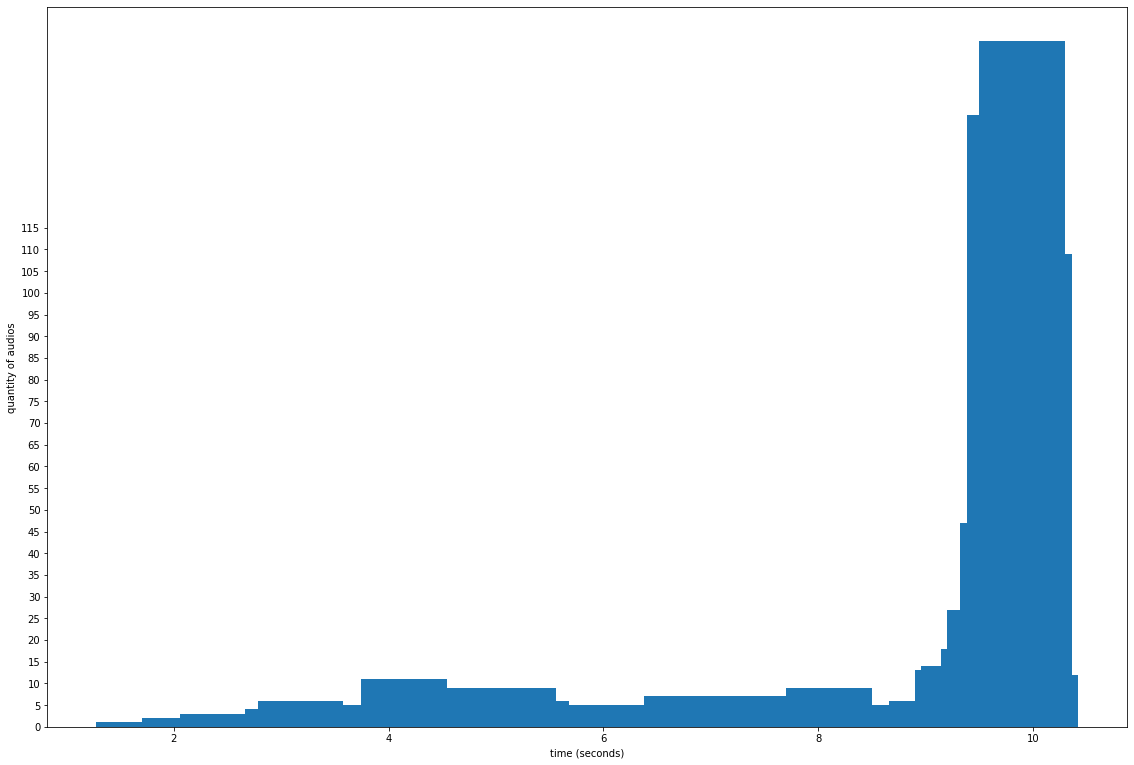

In [11]:
print(" ... Duração original ... ")
dictDuration = calculoMetricasDurationOriginal(durationOriginal)
plotDuracaoOriginal(dictDuration)

 ... Duração trim 28 db... 
Duração --->  {0.3250793650793651: 1, 0.33668934240362813: 1, 0.37151927437641724: 1, 0.3831292517006803: 1, 0.3947392290249433: 1, 0.4527891156462585: 1, 0.5224489795918368: 1, 0.5340589569160997: 1, 0.5456689342403628: 1, 0.5572789115646258: 2, 0.5688888888888889: 1, 0.615328798185941: 1, 0.626938775510204: 1, 0.6385487528344671: 2, 0.6617687074829932: 4, 0.6849886621315193: 1, 0.6965986394557823: 2, 0.7082086167800453: 2, 0.7314285714285714: 3, 0.7430385487528345: 1, 0.7546485260770975: 3, 0.7778684807256235: 2, 0.7894784580498866: 3, 0.8010884353741496: 1, 0.8126984126984127: 3, 0.8243083900226758: 4, 0.8359183673469388: 2, 0.8475283446712019: 3, 0.8591383219954648: 2, 0.8707482993197279: 1, 0.893968253968254: 3, 0.905578231292517: 3, 0.9404081632653061: 2, 0.9520181405895691: 3, 0.9636281179138322: 1, 0.9868480725623583: 2, 0.9984580498866213: 2, 1.0100680272108844: 1, 1.0216780045351475: 1, 1.0797278911564625: 3, 1.0913378684807256: 3, 1.11455782312925

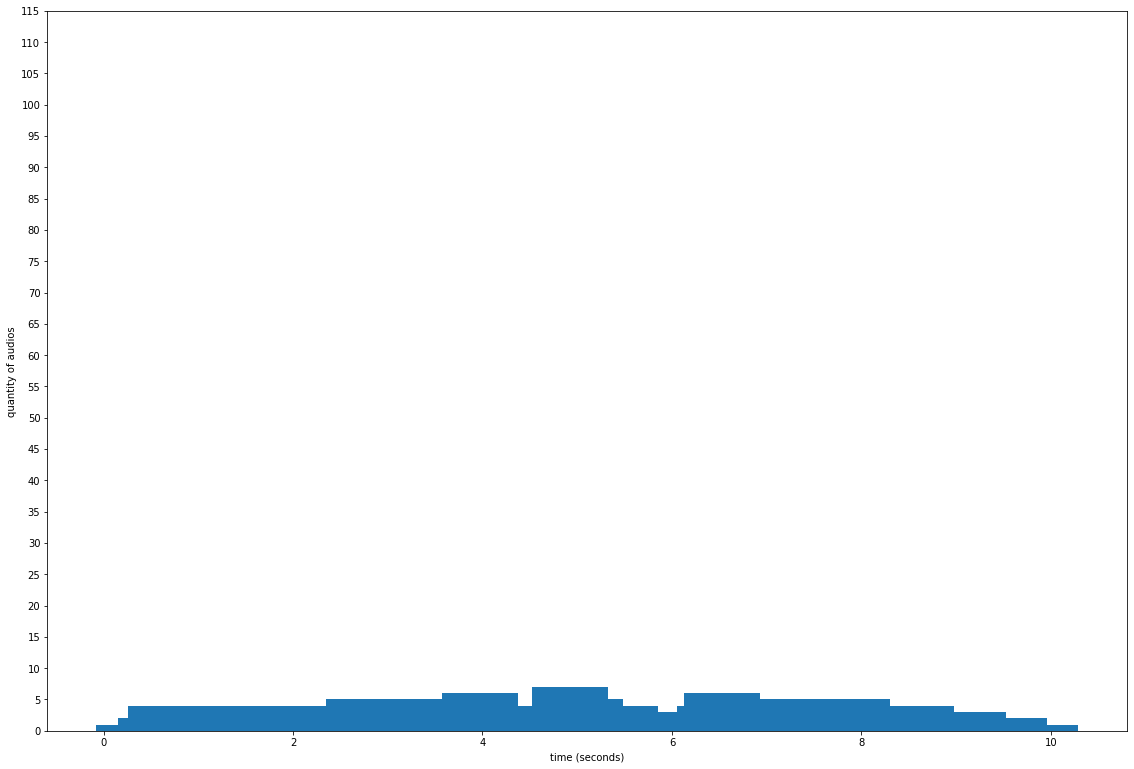

In [15]:
print(" ... Duração trim 28 db... ")
dictDurationTrim = calculoMetricasDurationOriginal(durationTrim)
plotDuracaoOriginal(dictDurationTrim)

 ... Duração trim 50 db... 
Duração --->  {0.5456689342403628: 1, 0.8010884353741496: 1, 0.893968253968254: 1, 0.9171882086167801: 1, 0.9287981859410431: 1, 0.9520181405895691: 1, 1.0216780045351475: 1, 1.0332879818594105: 1, 1.0448979591836736: 1, 1.0681179138321995: 1, 1.0797278911564625: 1, 1.0913378684807256: 2, 1.1029478458049886: 1, 1.172607709750567: 1, 1.195827664399093: 2, 1.2388208616780045: 1, 1.242267573696145: 1, 1.253877551020408: 1, 1.3119274376417234: 1, 1.3351473922902495: 1, 1.3467573696145125: 2, 1.3699773242630386: 1, 1.3815873015873017: 1, 1.4048072562358276: 1, 1.4164172335600906: 1, 1.4396371882086167: 2, 1.486077097505669: 2, 1.509297052154195: 1, 1.5209070294784581: 2, 1.5441269841269842: 1, 1.595283446712018: 1, 1.6021768707482993: 3, 1.6718367346938776: 1, 1.7414965986394557: 1, 1.7531065759637188: 1, 1.7647165532879818: 1, 1.8343764172335602: 1, 1.8459863945578232: 1, 1.8575963718820863: 1, 1.8808163265306121: 1, 1.9040362811791383: 2, 1.9156462585034013: 1,

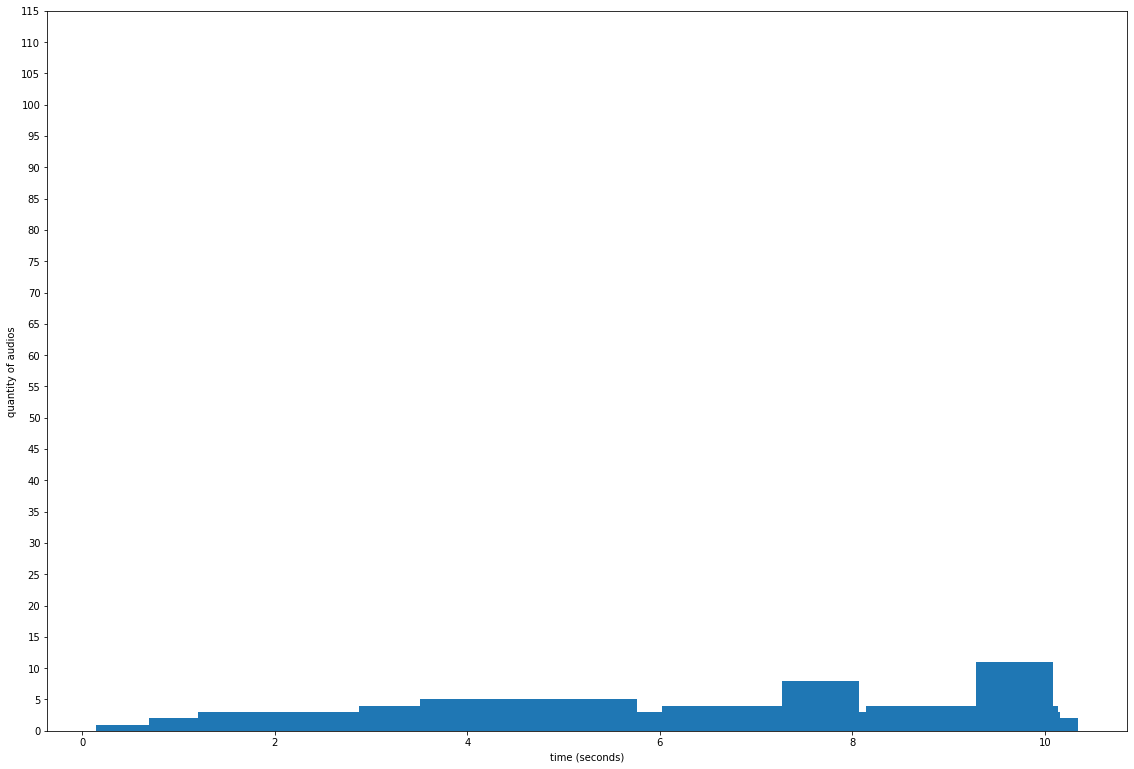

In [13]:
print(" ... Duração trim 50 db... ")
dictDurationTrim50 = calculoMetricasDurationOriginal(durationTrim50)
plotDuracaoOriginal(dictDurationTrim50)

 ... Duração trim 60 db... 
Duração --->  {0.8126984126984127: 1, 0.905578231292517: 1, 0.9520181405895691: 1, 0.9636281179138322: 2, 1.0448979591836736: 1, 1.1145578231292517: 1, 1.1377777777777778: 1, 1.207437641723356: 1, 1.253877551020408: 1, 1.3699773242630386: 2, 1.4048072562358276: 1, 1.4164172335600906: 1, 1.4396371882086167: 1, 1.4512471655328798: 1, 1.4932879818594105: 1, 1.5174603174603174: 1, 1.5209070294784581: 1, 1.5325170068027212: 1, 1.595283446712018: 1, 1.6137868480725623: 1, 1.6718367346938776: 1, 1.7066666666666668: 1, 1.7647165532879818: 2, 1.8459863945578232: 1, 1.9040362811791383: 1, 1.9272562358276644: 1, 1.9620861678004535: 1, 1.9736961451247166: 1, 1.9853061224489796: 1, 1.996689342403628: 1, 2.0085260770975055: 1, 2.020136054421769: 1, 2.0317460317460316: 1, 2.047800453514739: 1, 2.066575963718821: 2, 2.089795918367347: 1, 2.10140589569161: 1, 2.124625850340136: 1, 2.147845804988662: 1, 2.159455782312925: 1, 2.1942857142857144: 1, 2.2291156462585033: 1, 2.240

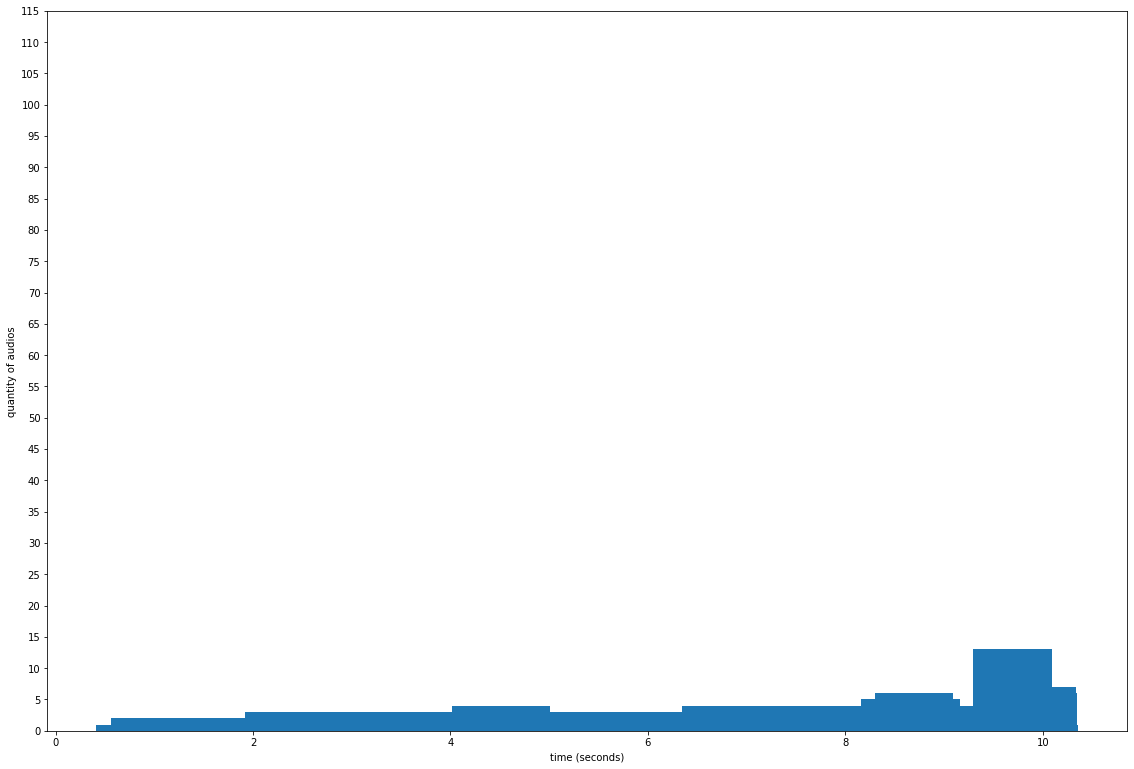

In [14]:
print(" ... Duração trim 60 db... ")
dictDurationTrim60 = calculoMetricasDurationOriginal(durationTrim60)
plotDuracaoOriginal(dictDurationTrim60)